In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from google.colab import files
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Uploading the test and training data files on google colab.

In [2]:
uploaded = files.upload()

Saving training_features - Copy.csv to training_features - Copy.csv


In [3]:
uploaded_test = files.upload()

Saving test_features - Copy.csv to test_features - Copy.csv


In [4]:
training_data = pd.read_csv('training_features - Copy.csv')
test_data = pd.read_csv('test_features - Copy.csv')

# Separating predictor and target variables.

In [5]:
X_train = training_data.iloc[:, 4:].values
Y_train = training_data.iloc[:, 2].values
X_test = test_data.iloc[:, 4:].values
Y_test = test_data.iloc[:, 2].values

# Standardising Data

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Componenet Analysis (PCA)

In [7]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Common Functions

In [8]:
# Evaluation Metrics calculations
def MetricCalculations (model, X_train, y_labels_train):
  # Calinski-Harabasz Index
  chs = calinski_harabasz_score(X_train,y_labels_train)
  # Davies-Bouldin Index
  db = davies_bouldin_score(X_train,y_labels_train)
  # Silhouette Coefficient
  slc = silhouette_score(X_train,y_labels_train,metric='euclidean')
  print(model,' Calinski-Harabasz Index ', chs)
  print(model,' Davies-Bouldin Index ', db)
  print(model,' Silhouette Coefficient ',slc)

# Performing cluster label predictions
def TrainingPrediction (algorithm, X_train):
  algorithm.fit(X_train)
  if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(int)
  else:
    y_pred = algorithm.predict(X_train)
  return y_pred

# K-Means Clustering Algorithm

In [9]:
# 'Elbow Method' to determine optimal value of 'K'
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = cluster.KMeans(n_clusters = k, random_state=10)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

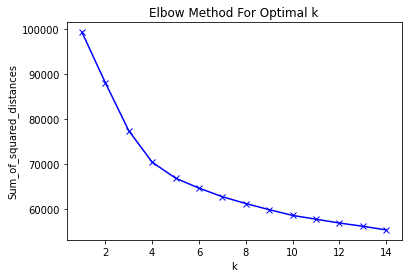

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
n_clusters = 5
kmeans = cluster.KMeans(n_clusters = n_clusters, random_state=10)
y_labels_train = TrainingPrediction(kmeans, X_train)
MetricCalculations('KMeans', X_train, y_labels_train)
print('Unique labels: ', np.unique(y_labels_train))

KMeans  Calinski-Harabasz Index  137.88127310738014
KMeans  Davies-Bouldin Index  1.7410492303597636
KMeans  Silhouette Coefficient  0.11380541007045138
Unique labels:  [0 1 2 3 4]


# Agglomerative Clustering

In [12]:
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X_train, n_neighbors= n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
aggm = cluster.AgglomerativeClustering(
        n_clusters= n_clusters, linkage='ward',
        connectivity=connectivity)
y_labels_train = TrainingPrediction(aggm, X_train)
MetricCalculations('Agglomerative', X_train, y_labels_train)
print('Unique labels: ', np.unique(y_labels_train))

Agglomerative  Calinski-Harabasz Index  121.27040896094488
Agglomerative  Davies-Bouldin Index  1.8376290784833909
Agglomerative  Silhouette Coefficient  0.0942504854950443
Unique labels:  [0 1 2 3 4]


# Spectral Clustering

In [13]:
spectral = cluster.SpectralClustering(
        n_clusters= n_clusters, eigen_solver='arpack',
        affinity="nearest_neighbors")
y_labels_train = TrainingPrediction(spectral, X_train)
MetricCalculations('Spectral', X_train, y_labels_train)
print('Unique labels: ', np.unique(y_labels_train))

Spectral  Calinski-Harabasz Index  134.27715606849372
Spectral  Davies-Bouldin Index  1.7367711016972343
Spectral  Silhouette Coefficient  0.10697310465608471
Unique labels:  [0 1 2 3 4]


# Optics Clustering

In [14]:
optics = cluster.OPTICS(min_samples=20,
                            xi=0.035,
                            min_cluster_size=0.2)
y_labels_train = TrainingPrediction(optics, X_train)
MetricCalculations('Optics', X_train, y_labels_train)
print('Unique labels: ', np.unique(y_labels_train))

Optics  Calinski-Harabasz Index  108.78724630187858
Optics  Davies-Bouldin Index  1.4978440409622835
Optics  Silhouette Coefficient  0.544087639028995
Unique labels:  [-1  0]


# Birch Clustering

In [15]:
birch = cluster.Birch(n_clusters=n_clusters)
y_labels_train = TrainingPrediction(birch, X_train)
MetricCalculations('Birch', X_train, y_labels_train)
print('Unique labels: ', np.unique(y_labels_train))

Birch  Calinski-Harabasz Index  121.00293460625726
Birch  Davies-Bouldin Index  1.8980527657301305
Birch  Silhouette Coefficient  0.09139161532719363
Unique labels:  [0 1 2 3 4]


# Gaussian Mixture Clustering

In [16]:
gmm = GaussianMixture(
        n_components=n_clusters, covariance_type='full')
y_labels_train = TrainingPrediction(gmm, X_train)
MetricCalculations('Gaussian Mixture', X_train, y_labels_train)
print('Unique labels: ', np.unique(y_labels_train))

Gaussian Mixture  Calinski-Harabasz Index  114.58176274348357
Gaussian Mixture  Davies-Bouldin Index  2.4943114701868265
Gaussian Mixture  Silhouette Coefficient  0.06904298730804262
Unique labels:  [0 1 2 3 4]


# Predicting cluster labels for test data using K-Means

In [17]:
y_labels_test = kmeans.predict(X_test)
training_data['clusterPreds']= y_labels_train
test_data['clusterPreds']= y_labels_test
print('Unique labels: ', np.unique(y_labels_test))

Unique labels:  [0 1 4]


# Memory-based collaborative filtering Recommendation system

In [18]:
def GetRecommendedEssay(row):
  test_overall_score = row['overall_score']
  clusterNumber = row['clusterPreds']
  referenceData = training_data.loc[training_data['clusterPreds'] == clusterNumber]
  processedRefData = referenceData.loc[referenceData['overall_score'].isin([test_overall_score + 1,test_overall_score + 2])]
  # Recommendaing 5 essays
  return processedRefData.sample(n = 5)

for index, row in test_data.iterrows():
  print('test doc: ', row.doc_id)
  recommendations = GetRecommendedEssay(row)
  print(recommendations[['doc_id', 'overall_score','clusterPreds']])
  #break

test doc:  doc2797.txt
           doc_id  overall_score  clusterPreds
1038   doc804.txt             32             1
109   doc1220.txt             31             1
357   doc1826.txt             31             1
102   doc1204.txt             32             1
698   doc2564.txt             32             1


# Plotting K-Means clusters

In [43]:
X_train = training_data.iloc[:, 4:]
Y_train = training_data.iloc[:, 2]

In [44]:
X_train = pd.DataFrame(pca.fit_transform(sc.fit_transform(X_train)))

In [45]:
kmeans = cluster.KMeans(n_clusters = 5)
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)
X_train["Cluster"] = clusters

In [46]:
# Using PCA to reduce to two dimensions
pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(X_train.drop(["Cluster"], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
X_train = pd.concat([X_train,PCs_2d], axis=1, join='inner')

In [47]:
cluster0 = X_train[X_train["Cluster"] == 0]
cluster1 = X_train[X_train["Cluster"] == 1]
cluster2 = X_train[X_train["Cluster"] == 2]
cluster3 = X_train[X_train["Cluster"] == 3]
cluster4 = X_train[X_train["Cluster"] == 4]

In [48]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 245, 100, 0.8)'),
                    text = None)
#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 150, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'Principal Component 1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Principal Component 2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)